In [1]:
from langgraph.graph import StateGraph, START, END
from langgraph.checkpoint.memory import InMemorySaver
from langchain_core.runnables import RunnableConfig
from typing import Annotated
from typing_extensions import TypedDict
from operator import add
from IPython.display import display, Image

In [2]:
class State(TypedDict):
    foo: str
    bar: Annotated[list[str], add]

def node_a(state: State):
    return {"foo": "a", "bar": ["a"]}

def node_b(state: State):
    return {"foo": "b", "bar": ["b"]}

In [3]:
workflow = StateGraph(State)
workflow.add_node(node_a)
workflow.add_node(node_b)
workflow.add_edge(START, "node_a")
workflow.add_edge("node_a", "node_b")
workflow.add_edge("node_b", END)

In [4]:
checkpointer = InMemorySaver()
graph = workflow.compile(checkpointer=checkpointer)


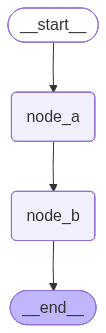

In [5]:
display(Image(graph.get_graph().draw_mermaid_png()))

In [6]:
config: RunnableConfig = {"configurable": {"thread_id": "1"}}
graph.invoke({"foo": "", "bar":[]}, config)

{'foo': 'b', 'bar': ['a', 'b']}